In [1]:
import numpy as np

ids, genders, populations, genomes = [], [], [], []

with open('data/p4/p4dataset2020.txt') as f:
    for l in f.readlines():
        parts = l.split(' ')
        ids.append(parts[0])
        genders.append(parts[1])
        populations.append(parts[2])
        genomes.append(parts[3:])

genomes = np.array(genomes)
N = len(ids)

In [2]:
import scipy.stats

X = []

modes = []
for col in range(genomes.shape[1]):
    modes.append(scipy.stats.mode(genomes[:, col])[0][0])

for genome in genomes:
    x = []
    for j, val in enumerate(genome):
        if genome[j] == modes[j]:
            x.append(0)
        else:
            x.append(1)
    X.append(x)

X = np.array(X)

In [3]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA(n_components=3)
pca.fit(X)

X_projected = pca.transform(X)

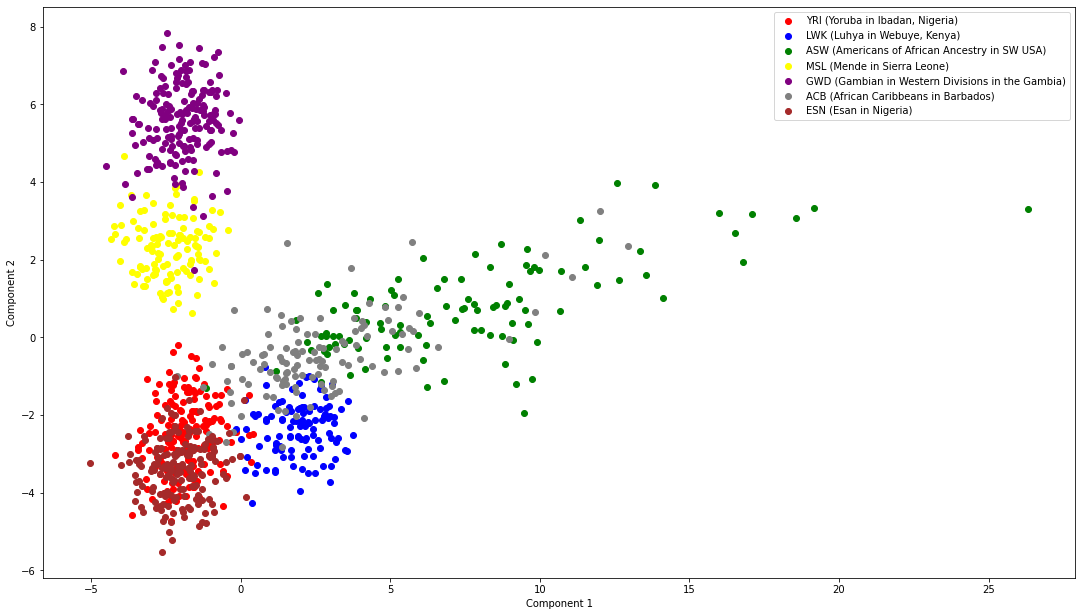

In [4]:
import matplotlib.pyplot as plt

population_colors = {
    'YRI': 'red',
    'LWK': 'blue',
    'ASW': 'green',
    'MSL': 'yellow',
    'GWD': 'purple',
    'ACB': 'grey',
    'ESN': 'brown'
}
population_names = {
    'YRI': 'Yoruba in Ibadan, Nigeria',
    'LWK': 'Luhya in Webuye, Kenya',
    'ASW': 'Americans of African Ancestry in SW USA',
    'MSL': 'Mende in Sierra Leone',
    'GWD': 'Gambian in Western Divisions in the Gambia',
    'ACB': 'African Caribbeans in Barbados',
    'ESN': 'Esan in Nigeria'    
}

def get_by_population(data, population):
    res = []
    for i, row in enumerate(data):
        if populations[i] == population:
            res.append(row)
    return np.array(res)
    
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

for population in population_colors.keys():
    data = get_by_population(X_projected, population)
    ax.scatter(data[:, 0], data[:, 1], color=population_colors[population], label=f'{population} ({population_names[population]})')

ax.legend()
plt.show()

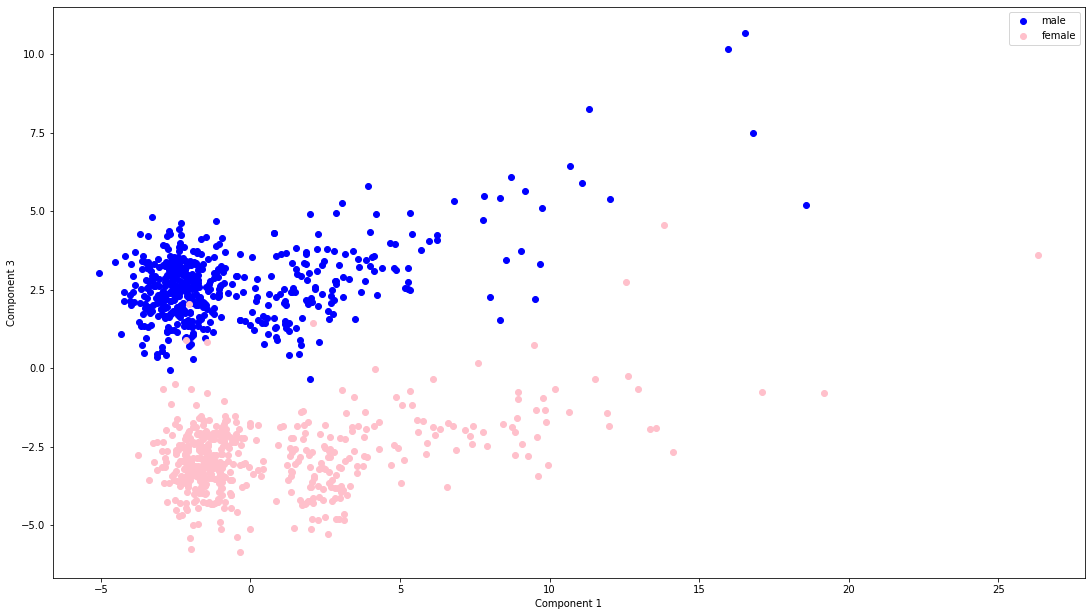

In [5]:
gender_names = {
    '1': 'male',
    '2': 'female'
}
gender_colors = {
    '1': 'blue',
    '2': 'pink'
}

def get_by_gender(data, gender):
    res = []
    for i, row in enumerate(data):
        if genders[i] == gender:
            res.append(row)
    return np.array(res)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 3')

for gender in ['1', '2']:
    data = get_by_gender(X_projected, gender)
    ax.scatter(data[:, 0], data[:, 2], color=gender_colors[gender], label=f'{gender_names[gender]}')

ax.legend()
plt.show()

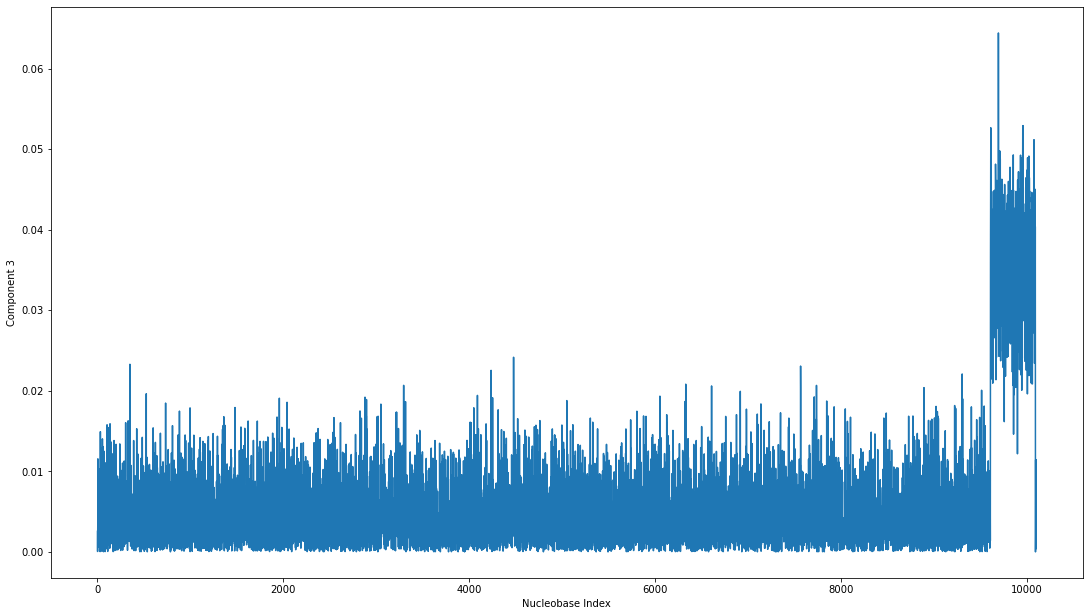

In [6]:
component_2 = pca.components_[2]

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.set_xlabel('Nucleobase Index')
ax.set_ylabel('Component 3')

ax.plot(np.arange(0, len(component_2)), [abs(x) for x in component_2])
plt.show()